In [4]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [8]:
data=pd.read_csv('train_data.csv')

In [9]:
data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [10]:
##Splitting

In [11]:
y=data.session_position
x=data.drop('session_position',axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1858569, 39) (1858569,)
(464643, 39) (464643,)


In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

Text(0, 0.5, 'Predictions')

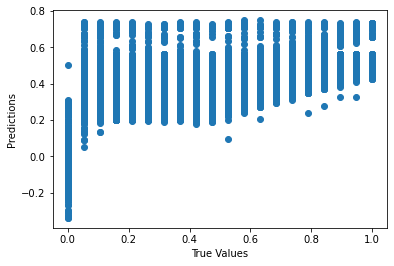

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [30]:
print(" accuracy score :", model.score(x_test, y_test))

 accuracy score : 0.2406511604124818


In [ ]:
#K-Folds Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [42]:
scores = cross_val_score(model, x_test, y_test)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 2.37729800e-01  2.40074390e-01  2.39001198e-01 -7.03284854e+17
  2.44070469e-01]


In [54]:
predictions = cross_val_predict(model, x_test, y_test)
plt.scatter(y, predictions)

LinAlgError: SVD did not converge in Linear Least Squares

In [51]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [4, 580803]